<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/SVM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is adopted from:


https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python




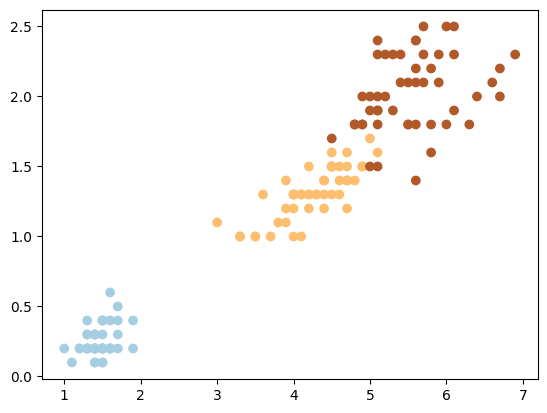

In [59]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target



# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1  # SVM regularization parameter
svc = svm.SVC(random_state=123, kernel='linear', C=C, max_iter=2000).fit(X, Y)
rbf_svc = svm.SVC(random_state=123, kernel='rbf', gamma=0.7, C=C, max_iter=2000).fit(X, Y)
poly_svc = svm.SVC(random_state=123,kernel='poly', degree=3, C=C, max_iter=2000).fit(X, Y)
lin_svc = svm.LinearSVC(random_state=123,C=C, max_iter=2000).fit(X, Y)

    # Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.show()


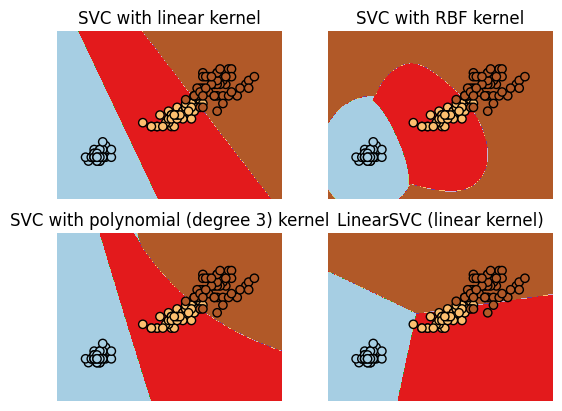

In [60]:

# Let's plot 2D mesh grid with division hiperplanes
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']


pl.set_cmap(pl.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    pl.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, Z)
    pl.axis('off')

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=Y.astype(float), cmap=pl.cm.Paired, edgecolors='k')#c=[0,0,0])

    pl.title(titles[i])

pl.show()

In [52]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's do a correct classification


In [61]:
from  sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [62]:
# Load IRIS
X, y = datasets.load_breast_cancer(return_X_y=True)

In [63]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=1, shuffle=True, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1, random_state=10, shuffle=True, stratify=y_temp)

In [68]:
C = 100  # SVM regularization parameter
svc = svm.SVC(random_state=123, kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(random_state=123, kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(random_state=123,kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(random_state=123,C=C).fit(X_train, y_train)

In [69]:
#svc test
y_pred = svc.predict(X_test)
scores_svc=metrics.accuracy_score(y_test,y_pred)

#rbf test
y_pred = rbf_svc.predict(X_test)
scores_rbf_svc=metrics.accuracy_score(y_test,y_pred)

#poly test
y_pred = poly_svc.predict(X_test)
scores_poly_svc=metrics.accuracy_score(y_test,y_pred)

#lin test
y_pred = lin_svc.predict(X_test)
scores_lin_svc=metrics.accuracy_score(y_test,y_pred)

print('SVC = ', scores_svc, ";  RBF = ", scores_rbf_svc, "; POLY = ", scores_poly_svc, "; LIN = ", scores_lin_svc, )


SVC =  0.9692982456140351 ;  RBF =  0.6271929824561403 ; POLY =  0.9254385964912281 ; LIN =  0.9692982456140351


What is the influence of space scaling?

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)
X_valid_std=scaler.transform(X_valid)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

In [71]:
C = 100  # SVM regularization parameter
svc = svm.SVC(random_state=123, kernel='linear', C=C).fit(X_train_mm, y_train)
rbf_svc = svm.SVC(random_state=123, kernel='rbf', gamma=0.7, C=C).fit(X_train_mm, y_train)
poly_svc = svm.SVC(random_state=123,kernel='poly', degree=3, C=C).fit(X_train_mm, y_train)
lin_svc = svm.LinearSVC(random_state=123,C=C).fit(X_train_mm, y_train)
#svc test
y_pred = svc.predict(X_test_mm)
scores_svc=metrics.accuracy_score(y_test,y_pred)

#rbf test
y_pred = rbf_svc.predict(X_test_mm)
scores_rbf_svc=metrics.accuracy_score(y_test,y_pred)

#poly test
y_pred = poly_svc.predict(X_test_mm)
scores_poly_svc=metrics.accuracy_score(y_test,y_pred)

#lin test
y_pred = lin_svc.predict(X_test_mm)
scores_lin_svc=metrics.accuracy_score(y_test,y_pred)

print('SVC_mm = ', scores_svc, ";  RBF_mm = ", scores_rbf_svc, "; POLY_mm = ", scores_poly_svc, "; LIN_mm = ", scores_lin_svc, )

SVC_mm =  0.9517543859649122 ;  RBF_mm =  0.9517543859649122 ; POLY_mm =  0.9429824561403509 ; LIN_mm =  0.9517543859649122


In [72]:
C = 100  # SVM regularization parameter
svc = svm.SVC(random_state=123, kernel='linear', C=C).fit(X_train_std, y_train)
rbf_svc = svm.SVC(random_state=123, kernel='rbf', gamma=0.7, C=C).fit(X_train_std, y_train)
poly_svc = svm.SVC(random_state=123,kernel='poly', degree=3, C=C).fit(X_train_std, y_train)
lin_svc = svm.LinearSVC(random_state=123,C=C).fit(X_train_std, y_train)
#svc test
y_pred = svc.predict(X_test_std)
scores_svc=metrics.accuracy_score(y_test,y_pred)

#rbf test
y_pred = rbf_svc.predict(X_test_std)
scores_rbf_svc=metrics.accuracy_score(y_test,y_pred)

#poly test
y_pred = poly_svc.predict(X_test_std)
scores_poly_svc=metrics.accuracy_score(y_test,y_pred)

#lin test
y_pred = lin_svc.predict(X_test_std)
scores_lin_svc=metrics.accuracy_score(y_test,y_pred)

print('SVC_std = ', scores_svc, ";  RBF_std = ", scores_rbf_svc, "; POLY_std = ", scores_poly_svc, "; LIN_std = ", scores_lin_svc, )

SVC_std =  0.956140350877193 ;  RBF_std =  0.6710526315789473 ; POLY_std =  0.9649122807017544 ; LIN_std =  0.9517543859649122


**Advantages**
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.



**Disadvantages**
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [73]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.968 total time=   2.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.902 total time=   1.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.951 total time=   5.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.951 total time=   1.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   8.4s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [74]:

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
SVC(C=0.1, gamma=0.0001, kernel='poly')


In [75]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        85
           1       0.95      0.98      0.96       143

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228

